<a href="https://colab.research.google.com/github/marcinwolter/NORCC-SUMMER_2022/blob/main/dcgan_generate_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


epoch: 0, [Discriminator :: d_loss: 0.697487], [ Generator :: loss: 0.689493]


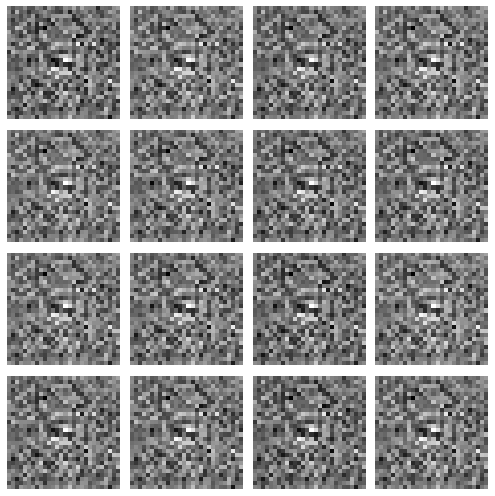

epoch: 500, [Discriminator :: d_loss: 0.582774], [ Generator :: loss: 1.008365]


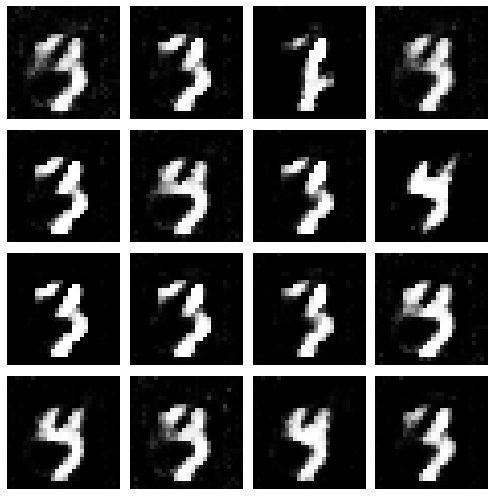

epoch: 1000, [Discriminator :: d_loss: 0.687823], [ Generator :: loss: 1.419959]


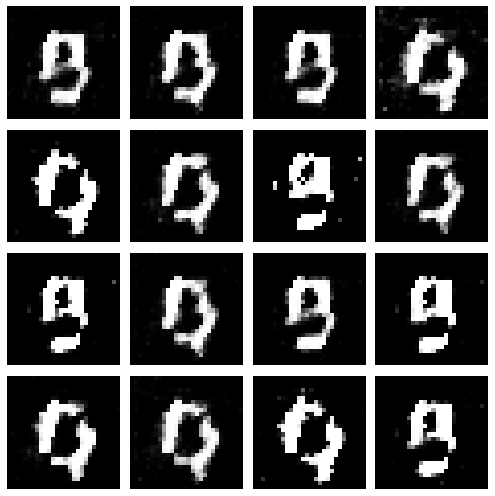

epoch: 1500, [Discriminator :: d_loss: 0.597166], [ Generator :: loss: 0.933405]


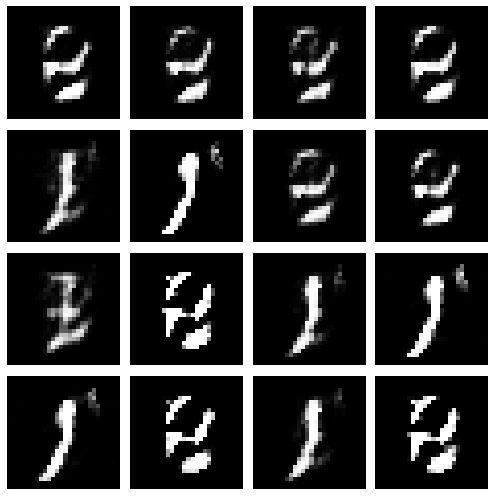

epoch: 2000, [Discriminator :: d_loss: 0.357570], [ Generator :: loss: 1.046803]


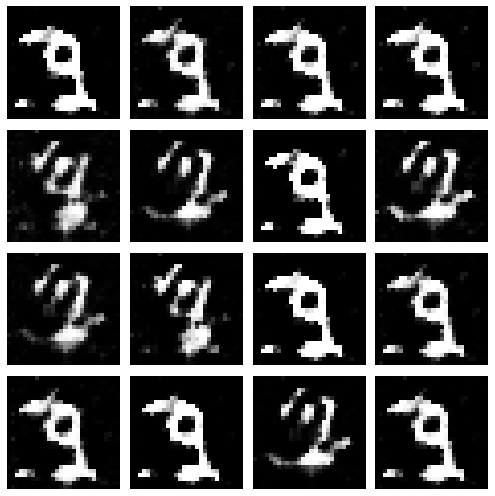

epoch: 2500, [Discriminator :: d_loss: 0.589909], [ Generator :: loss: 1.152158]


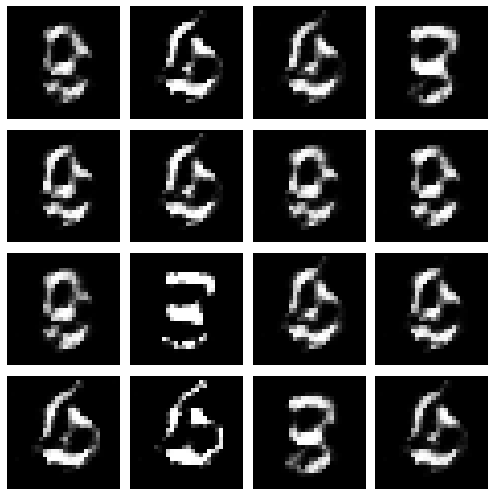

epoch: 3000, [Discriminator :: d_loss: 0.464907], [ Generator :: loss: 1.648370]


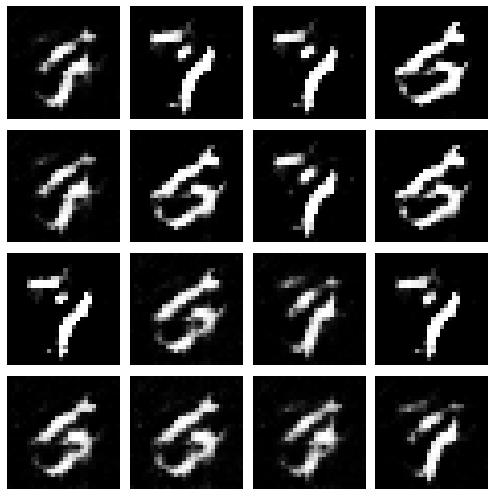

epoch: 3500, [Discriminator :: d_loss: 0.506534], [ Generator :: loss: 1.511502]


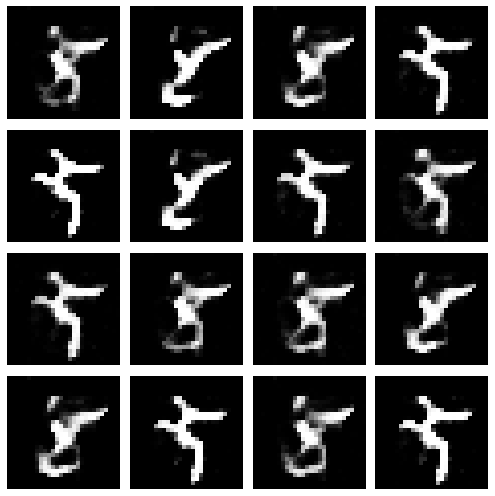

epoch: 4000, [Discriminator :: d_loss: 0.432837], [ Generator :: loss: 1.348855]


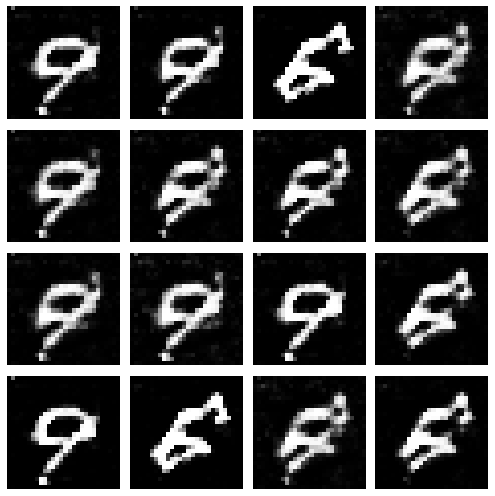

epoch: 4500, [Discriminator :: d_loss: 0.304464], [ Generator :: loss: 1.861322]


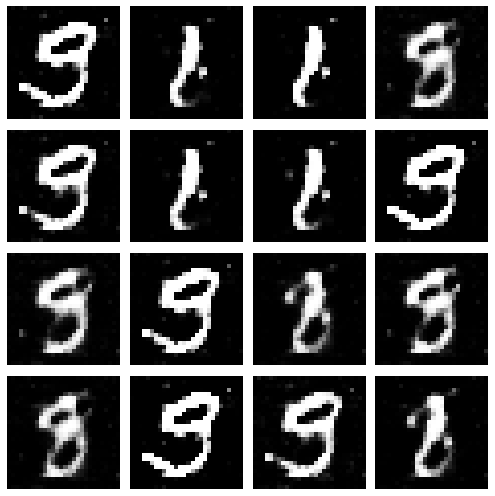

epoch: 5000, [Discriminator :: d_loss: 0.685679], [ Generator :: loss: 2.135910]


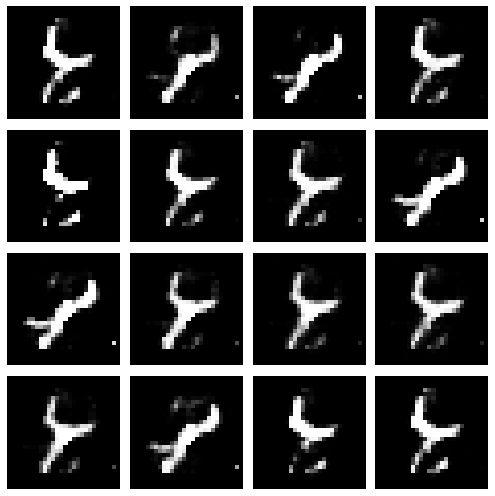

epoch: 5500, [Discriminator :: d_loss: 0.418404], [ Generator :: loss: 1.485829]


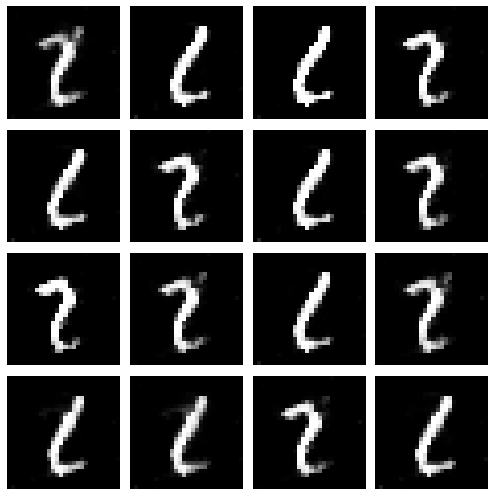

epoch: 6000, [Discriminator :: d_loss: 0.569574], [ Generator :: loss: 2.151438]


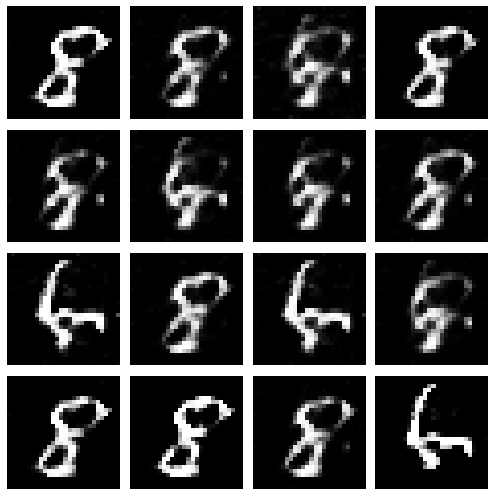

epoch: 6500, [Discriminator :: d_loss: 0.234702], [ Generator :: loss: 1.520709]


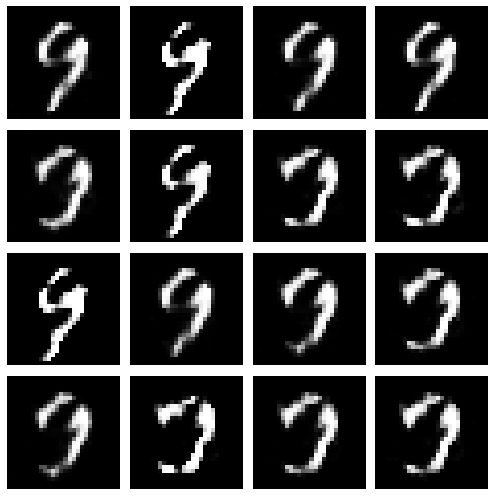

epoch: 7000, [Discriminator :: d_loss: 0.436104], [ Generator :: loss: 1.873201]


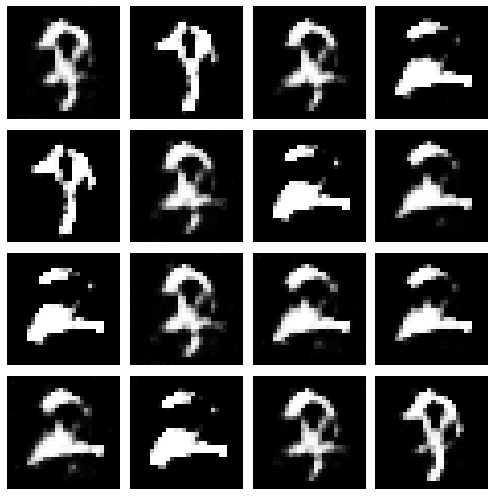

epoch: 7500, [Discriminator :: d_loss: 0.362403], [ Generator :: loss: 1.486377]


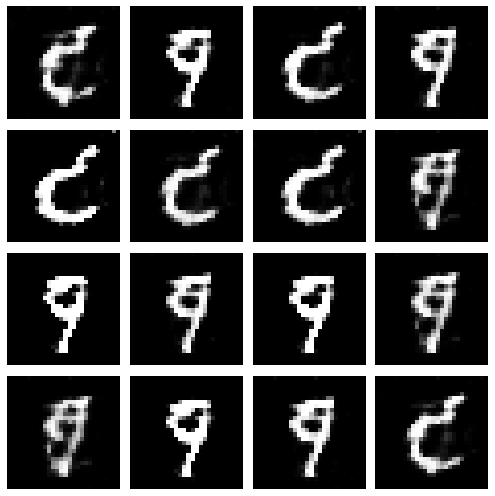

epoch: 8000, [Discriminator :: d_loss: 0.470719], [ Generator :: loss: 1.181774]


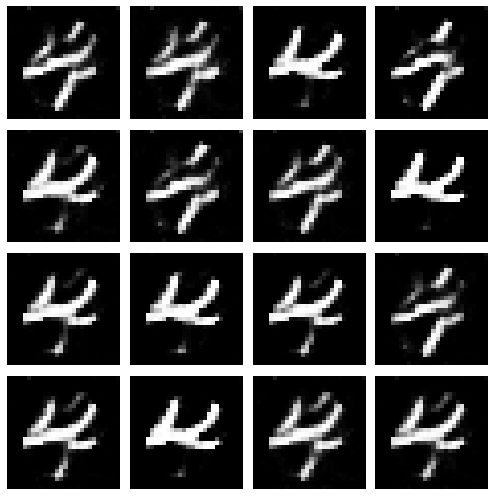

epoch: 8500, [Discriminator :: d_loss: 0.474559], [ Generator :: loss: 1.679142]


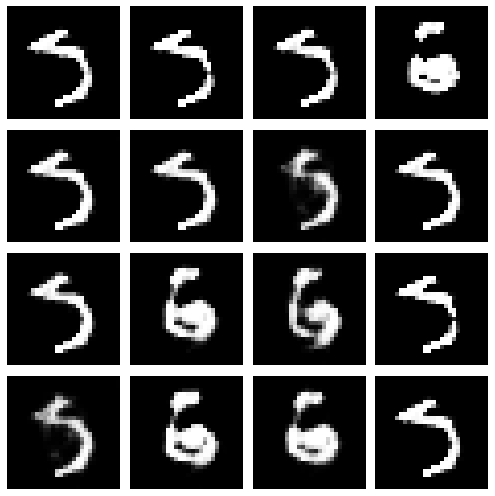

epoch: 9000, [Discriminator :: d_loss: 0.415204], [ Generator :: loss: 1.937566]


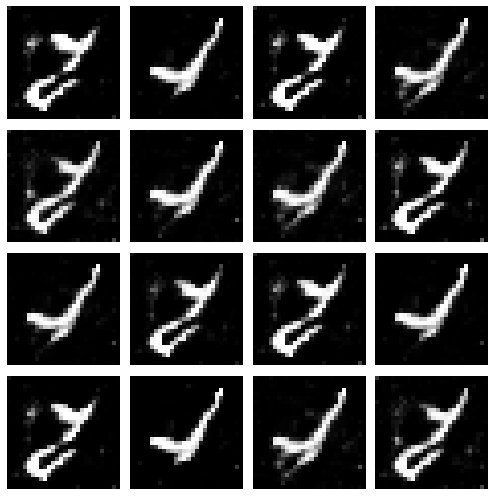

epoch: 9500, [Discriminator :: d_loss: 0.334301], [ Generator :: loss: 1.827181]


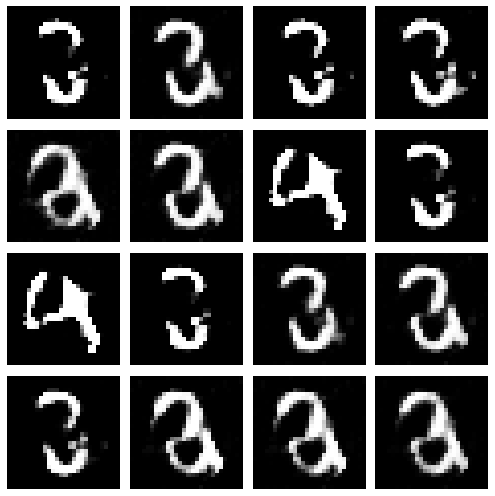

epoch: 10000, [Discriminator :: d_loss: 0.234412], [ Generator :: loss: 1.318130]


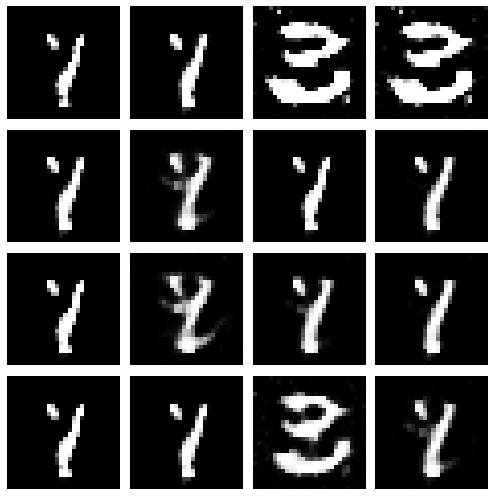

epoch: 10500, [Discriminator :: d_loss: 0.285133], [ Generator :: loss: 1.178038]


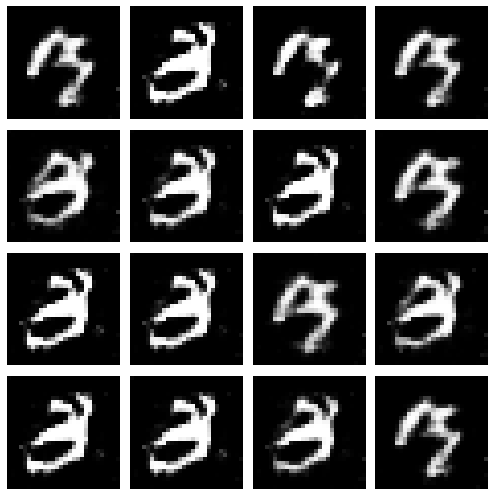

epoch: 11000, [Discriminator :: d_loss: 0.307385], [ Generator :: loss: 1.836496]


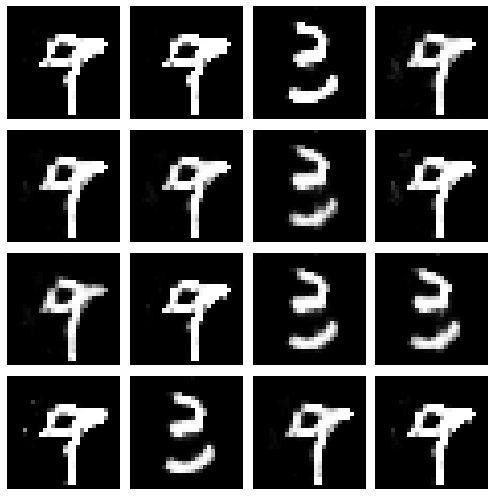

epoch: 11500, [Discriminator :: d_loss: 0.375412], [ Generator :: loss: 2.007577]


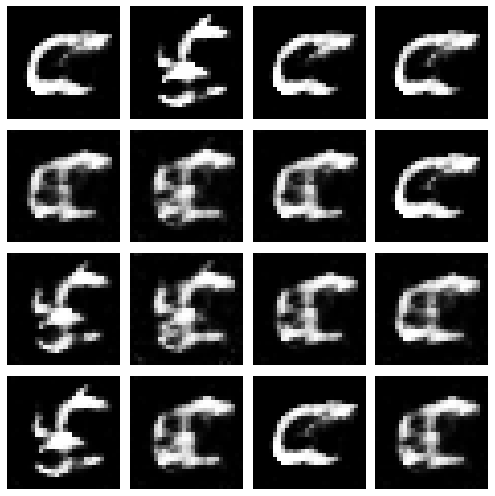

epoch: 12000, [Discriminator :: d_loss: 0.227194], [ Generator :: loss: 2.380702]


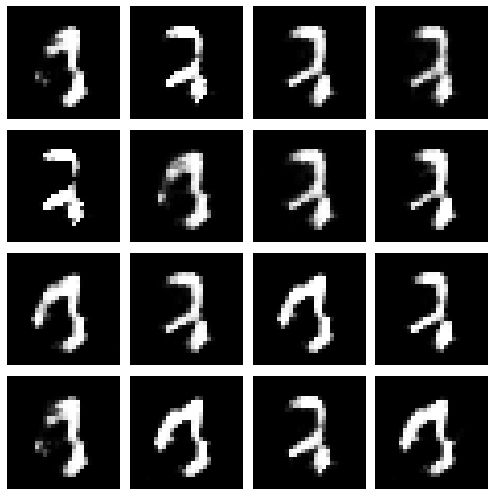

epoch: 12500, [Discriminator :: d_loss: 0.451470], [ Generator :: loss: 2.582539]


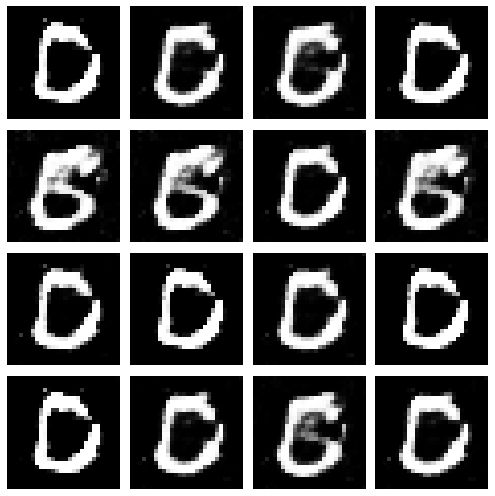

epoch: 13000, [Discriminator :: d_loss: 0.486619], [ Generator :: loss: 1.725712]


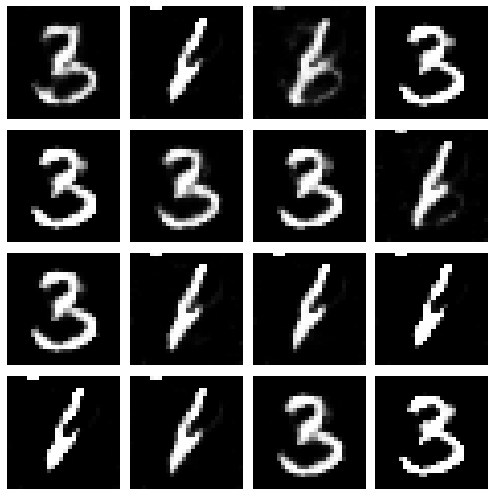

epoch: 13500, [Discriminator :: d_loss: 0.526730], [ Generator :: loss: 2.801306]


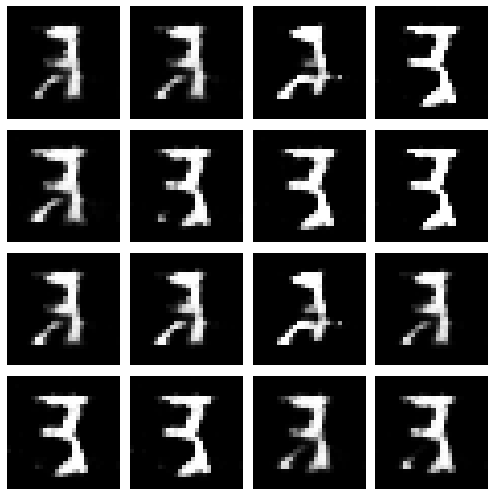

epoch: 14000, [Discriminator :: d_loss: 0.415706], [ Generator :: loss: 1.746380]


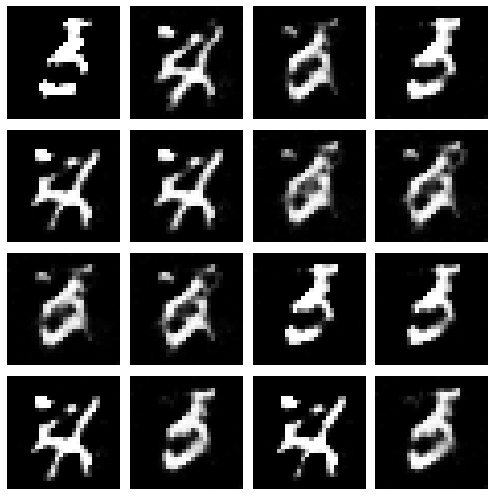

epoch: 14500, [Discriminator :: d_loss: 0.728236], [ Generator :: loss: 1.970268]


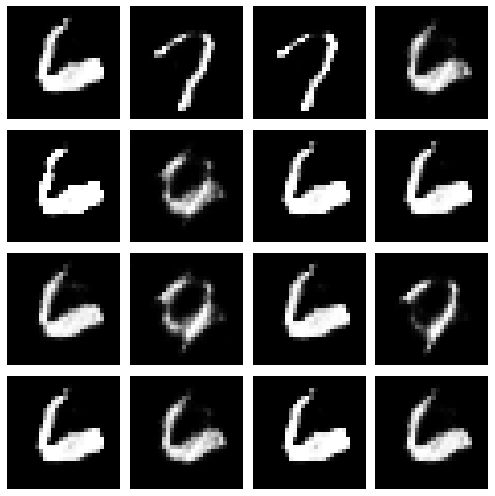

epoch: 15000, [Discriminator :: d_loss: 0.302091], [ Generator :: loss: 1.910338]


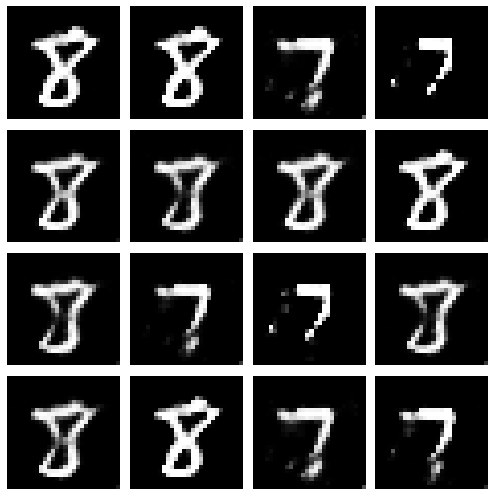

epoch: 15500, [Discriminator :: d_loss: 0.201953], [ Generator :: loss: 1.773059]


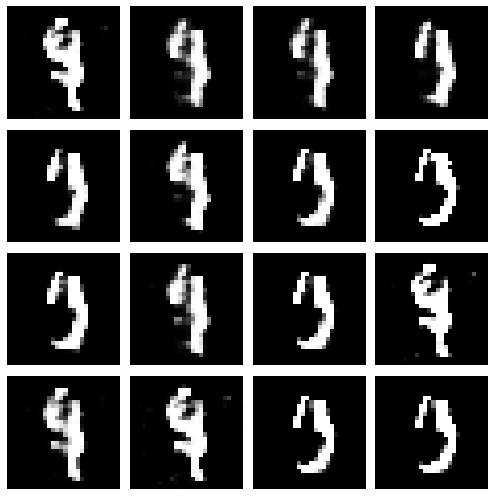

epoch: 16000, [Discriminator :: d_loss: 0.406543], [ Generator :: loss: 2.577375]


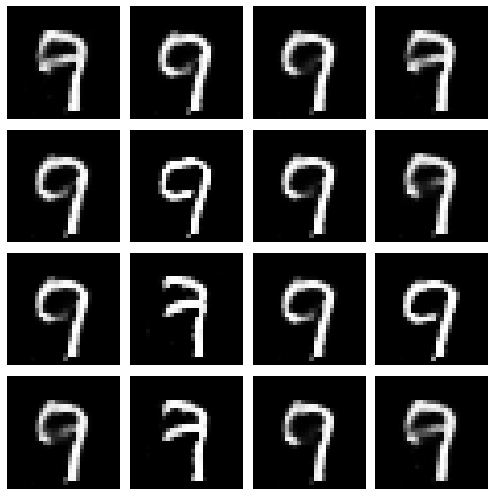

epoch: 16500, [Discriminator :: d_loss: 0.480407], [ Generator :: loss: 1.906131]


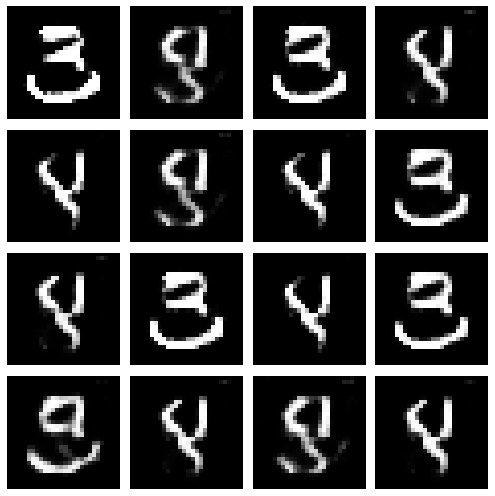

epoch: 17000, [Discriminator :: d_loss: 0.338497], [ Generator :: loss: 1.254280]


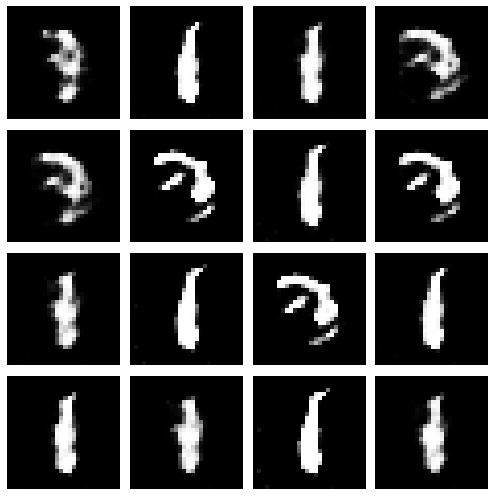

epoch: 17500, [Discriminator :: d_loss: 0.416803], [ Generator :: loss: 1.870318]


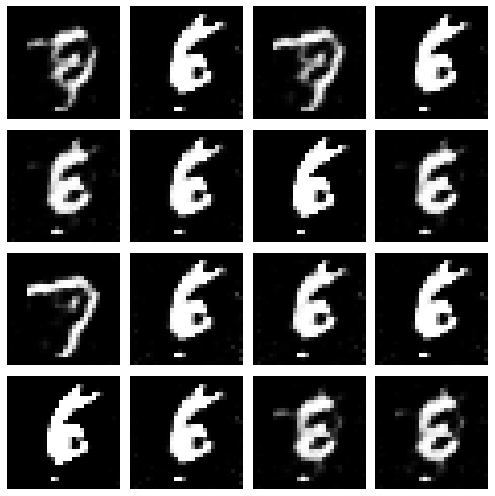

epoch: 18000, [Discriminator :: d_loss: 0.621091], [ Generator :: loss: 2.274577]


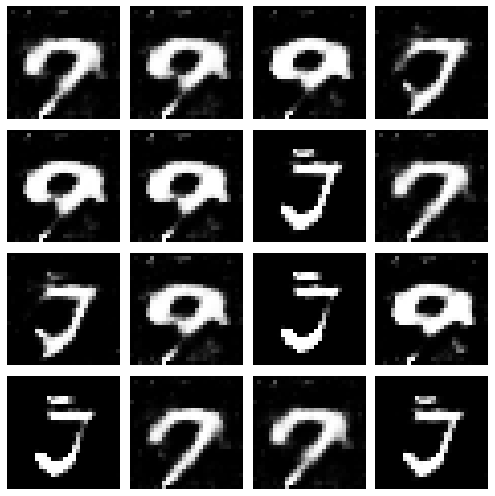

epoch: 18500, [Discriminator :: d_loss: 0.466313], [ Generator :: loss: 2.232088]


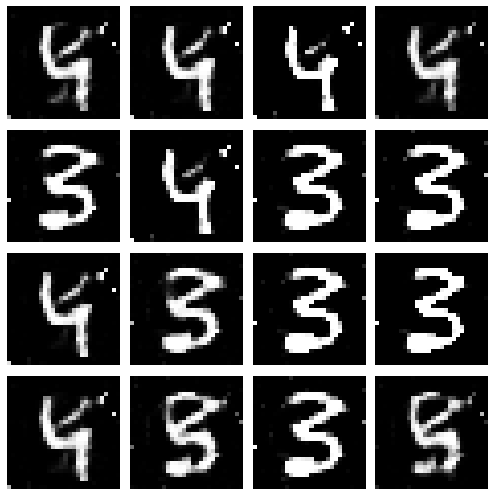

epoch: 19000, [Discriminator :: d_loss: 0.240822], [ Generator :: loss: 1.839054]


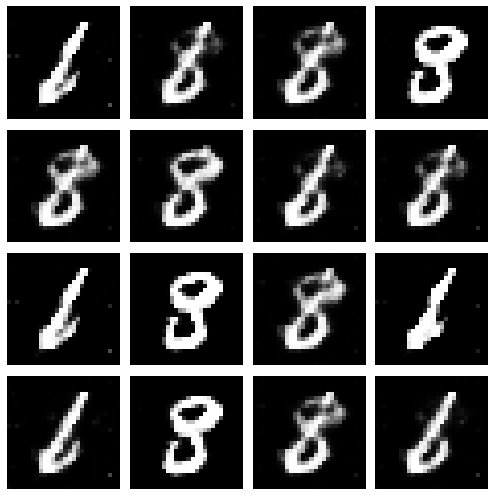

epoch: 19500, [Discriminator :: d_loss: 0.278739], [ Generator :: loss: 2.068484]


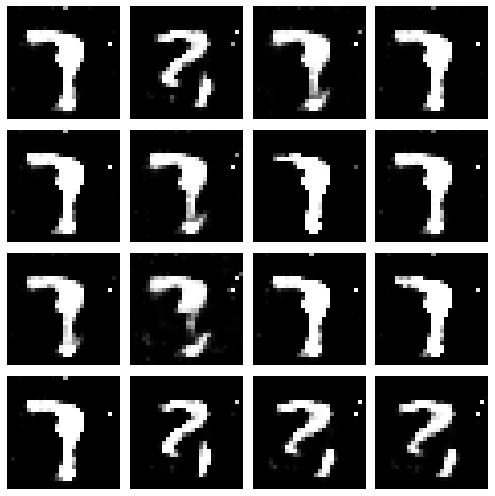

epoch: 20000, [Discriminator :: d_loss: 0.211797], [ Generator :: loss: 1.917512]


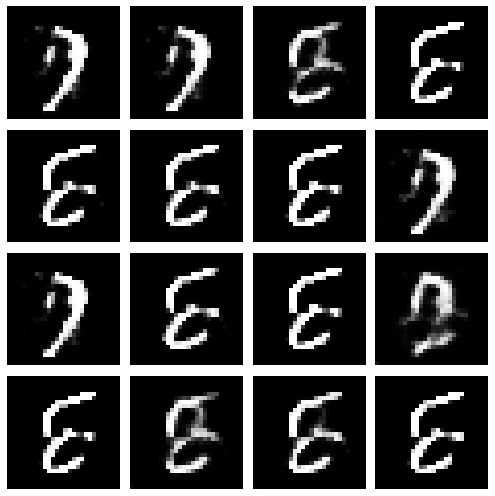

In [ ]:
""" Simple implementation of Generative Adversarial Neural Network """

import numpy as np

#from IPython.core.debugger import Tracer

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, Activation, UpSampling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
#plt.switch_backend('agg')   # allows code to run without a system DISPLAY


class GAN(object):
    """ Generative Adversarial Network class """
    def __init__(self, width=28, height=28, channels=1):

        self.width = width
        self.height = height
        self.channels = channels

        self.shape = (self.width, self.height, self.channels)

        self.optimizer = Adam(lr=0.0002, beta_1=0.5, decay=8e-8)

        self.G = self.__generator()
        self.G.compile(loss='binary_crossentropy', optimizer=self.optimizer)

        self.D = self.__discriminator()
        self.D.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])

        self.stacked_generator_discriminator = self.__stacked_generator_discriminator()

        self.stacked_generator_discriminator.compile(loss='binary_crossentropy', optimizer=self.optimizer)


    def __generator(self):
        """ Declare generator """

        model = Sequential()
        '''
        model.add(Dense(256, input_shape=(100,)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.width  * self.height * self.channels, activation='tanh'))
        model.add(Reshape((self.width, self.height, self.channels)))
        '''

        model.add(Input(shape=(100,)))
        model.add(Dense(7 * 7 * 128))
        model.add(Reshape((7, 7, 128)))
        model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Dense(self.width  * self.height * self.channels, activation='tanh'))
        model.add(Reshape((self.width, self.height, self.channels)))



        return model

    def __discriminator(self):
        """ Declare discriminator """

        model = Sequential()
        '''        
        model.add(Flatten(input_shape=self.shape))
        model.add(Dense((self.width * self.height * self.channels), input_shape=self.shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(np.int64((self.width * self.height * self.channels)/2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        '''
        
        depth = 64
        dropout = 0.4
        # In: 28 x 28 x 1, depth = 1
        # Out: 14 x 14 x 1, depth=64
        input_shape = (self.width, self.height, self.channels)
        model.add(Conv2D(depth*1, 5, strides=2, input_shape=input_shape,\
            padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(dropout))

        model.add(Conv2D(depth*2, 5, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(dropout))

        model.add(Conv2D(depth*4, 5, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(dropout))
        
        model.add(Conv2D(depth*8, 5, strides=1, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(dropout))


        # Out: 1-dim probability
        model.add(Flatten())
        model.add(Dense(1))
        model.add(Activation('sigmoid'))
        

        return model

    def __stacked_generator_discriminator(self):

        self.D.trainable = False

        model = Sequential()
        model.add(self.G)
        model.add(self.D)

        return model

    def train(self, X_train, epochs=20001, batch = 32, save_interval = 500):

        for cnt in range(epochs):

            ## train discriminator
            random_index = np.random.randint(0, len(X_train) - batch/2)
            legit_images = X_train[random_index : random_index + int(batch/2)].reshape(int(batch/2), self.width, self.height, self.channels)

            gen_noise = np.random.normal(0, 1, (int(batch/2), 100))
            syntetic_images = self.G.predict(gen_noise)

            x_combined_batch = np.concatenate((legit_images, syntetic_images))
            y_combined_batch = np.concatenate((np.ones((int(batch/2), 1)), np.zeros((int(batch/2), 1))))

            d_loss = self.D.train_on_batch(x_combined_batch, y_combined_batch)


            # train generator

            noise = np.random.normal(0, 1, (batch, 100))
            y_mislabled = np.ones((batch, 1))

            g_loss = self.stacked_generator_discriminator.train_on_batch(noise, y_mislabled)

            if cnt % save_interval == 0:
                print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss[0], g_loss))

            if cnt % save_interval == 0:
                self.plot_images(save2file=False, step=cnt)


    def plot_images(self, save2file=False, samples=16, step=0):
        ''' Plot generated images '''
        filename = "./mnist_%d.png" % step
        noise = np.random.normal(0, 1, (samples, 100))

        images = self.G.predict(noise)

        plt.figure(figsize=(7, 7))

        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [self.height, self.width])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()

        if save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()


if __name__ == '__main__':
    (X_train, _), (_, _) = mnist.load_data()

    # Rescale -1 to 1
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)


    gan = GAN()

    gan.train(X_train)